In [35]:
import numpy as np
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


startdate = datetime.datetime(1993,1,1)
enddate = datetime.datetime(2023,1,1)

GetSANDP500 = yf.download('SPY', start=startdate, end=enddate)
#df = pd.DataFrame(GetSANDP500.history(start=startdate, end=enddate))
df = pd.DataFrame(GetSANDP500)
df.to_csv('SPY_raw.csv')


[*********************100%%**********************]  1 of 1 completed


In [3]:
df.index = df.index.strftime('%Y-%m-%d')
df = df.sort_index()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.029371,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.207388,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.260790,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.527821,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.634638,531500
...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,380.042480,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,378.543793,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,373.839294,70911500


In [4]:
#Adding daily returns and monthly returns to the dataset, vwap
df = df.assign(
    SMA_5 = df['Close'].rolling(5).mean(),
    SMA_20 = df['Close'].rolling(20).mean(),
    SMA_50 = df['Close'].rolling(50).mean(),
    SMA_252 = df['Close'].rolling(252).mean(),    
    daily_return = (df['Close'].pct_change() * 100).round(2),
    monthly_return = (df['Close'].pct_change(30) * 100).round(2),
    adv20 = df["Volume"].rolling(20).mean(),
    VWAP = (df['Volume'] * df['Close']).cumsum() / df['Volume'].cumsum()
)

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_20,SMA_50,SMA_252,daily_return,monthly_return,adv20,VWAP
Date,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.029371,1003200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.937500
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.207388,480500,NaN,NaN,NaN,NaN,0.71,NaN,NaN,44.038704
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.260790,201300,NaN,NaN,NaN,NaN,0.21,NaN,NaN,44.075147
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.527821,529400,NaN,NaN,NaN,NaN,1.06,NaN,NaN,44.251427
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.634638,531500,44.468750,NaN,NaN,NaN,0.42,NaN,NaN,44.396322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,380.042480,59857300,382.084003,393.642500,387.845001,410.678811,0.58,-2.98,86359455.0,172.694474
2022-12-27,382.790009,383.149994,379.649994,381.399994,378.543793,51638200,382.360004,392.917000,388.320400,410.298414,-0.39,-4.29,85547285.0,172.711391
2022-12-28,381.329987,383.390015,376.420013,376.660004,373.839294,70911500,381.584003,391.988499,388.517200,409.900755,-1.24,-4.67,86477360.0,172.734091


In [6]:
#Add in log returns
df['log_returns'] = np.log(df['Close']) - np.log(df['Close'].shift(1)) 

In [7]:
#add in monthly volatility
df['volatility_30'] = df['log_returns'].rolling(30).std() * np.sqrt(30)
df['volatility_60'] = df['log_returns'].rolling(60).std() * np.sqrt(60)
df['annual_volatility'] = df['log_returns'].rolling(252).std() * np.sqrt(252)


In [8]:
#add in change in monthly vriation rapp

df["rapp"] = df["Close"].shift(-21).divide(df["Close"])

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_20,SMA_50,SMA_252,daily_return,monthly_return,adv20,VWAP,log_returns,volatility_30,volatility_60,annual_volatility,rapp
Date,,,,,,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.029371,1003200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.937500,NaN,NaN,NaN,NaN,1.022760
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.207388,480500,NaN,NaN,NaN,NaN,0.71,NaN,NaN,44.038704,0.007087,NaN,NaN,NaN,1.019774
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.260790,201300,NaN,NaN,NaN,NaN,0.21,NaN,NaN,44.075147,0.002116,NaN,NaN,NaN,1.011980
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.527821,529400,NaN,NaN,NaN,NaN,1.06,NaN,NaN,44.251427,0.010515,NaN,NaN,NaN,0.998605
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.634638,531500,44.468750,NaN,NaN,NaN,0.42,NaN,NaN,44.396322,0.004175,NaN,NaN,NaN,1.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,380.042480,59857300,382.084003,393.642500,387.845001,410.678811,0.58,-2.98,86359455.0,172.694474,0.005736,0.065398,0.124176,0.241817,NaN
2022-12-27,382.790009,383.149994,379.649994,381.399994,378.543793,51638200,382.360004,392.917000,388.320400,410.298414,-0.39,-4.29,85547285.0,172.711391,-0.003951,0.064516,0.123146,0.241376,NaN
2022-12-28,381.329987,383.390015,376.420013,376.660004,373.839294,70911500,381.584003,391.988499,388.517200,409.900755,-1.24,-4.67,86477360.0,172.734091,-0.012506,0.065085,0.121219,0.241655,NaN


In [10]:
#Remove rows with any missing values
df.dropna(inplace=True)


In [11]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_20,SMA_50,SMA_252,daily_return,monthly_return,adv20,VWAP,log_returns,volatility_30,volatility_60,annual_volatility,rapp
Date,,,,,,,,,,,,,,,,,,,
1994-01-27,47.406250,47.812500,47.343750,47.750000,27.884426,344500,47.362500,47.190625,46.843125,45.552951,0.92,2.76,323985.0,45.720153,0.009205,0.022625,0.035085,0.091262,0.980366
1994-01-28,47.937500,48.031250,47.875000,47.875000,27.957426,356500,47.462500,47.254688,46.870000,45.567336,0.26,2.68,326165.0,45.733333,0.002614,0.022554,0.032560,0.091039,0.973890
1994-01-31,48.062500,48.312500,48.000000,48.218750,28.158169,313800,47.668750,47.342188,46.906250,45.582713,0.72,3.56,293810.0,45.746642,0.007155,0.023276,0.031100,0.091278,0.968244
1994-02-01,48.156250,48.156250,47.906250,47.968750,28.012165,303600,47.825000,47.407812,46.939375,45.595238,-0.52,2.88,300775.0,45.758095,-0.005198,0.024128,0.031417,0.090870,0.970684
1994-02-02,48.125000,48.281250,48.093750,48.281250,28.194647,307600,48.018750,47.484375,46.984375,45.608259,0.65,3.90,280610.0,45.771203,0.006494,0.024321,0.031946,0.091000,0.966990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,399.549988,402.929993,399.309998,402.420013,397.580688,68261600,397.435999,388.374001,378.021801,416.439009,0.63,12.86,86479335.0,172.081450,0.006282,0.092324,0.129764,0.241529,0.951518
2022-11-25,401.829987,402.910004,401.540009,402.329987,397.491760,30545400,399.053998,389.491499,378.266000,416.172700,-0.02,9.94,83908015.0,172.092521,-0.000224,0.089540,0.129521,0.241507,0.947978
2022-11-28,399.089996,400.809998,395.109985,395.910004,391.148956,67881600,399.029999,389.836000,378.473000,415.922461,-1.60,10.70,82286995.0,172.116435,-0.016086,0.087682,0.130516,0.241003,0.951378


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

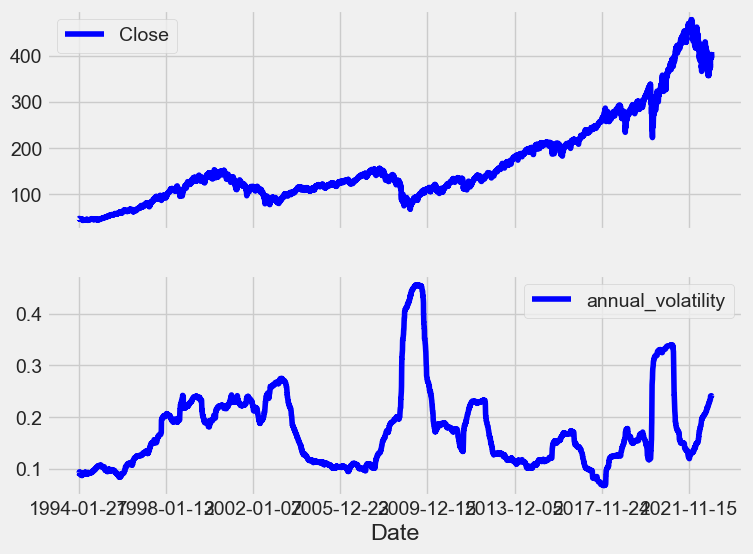

In [12]:
df[['Close', 'annual_volatility']].plot(subplots=True, color='blue',figsize=(8, 6))

In [13]:
#Data Visualisations: Descriptive Statistics
df.describe()


,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_20,SMA_50,SMA_252,daily_return,monthly_return,adv20,VWAP,log_returns,volatility_30,volatility_60,annual_volatility,rapp
count,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7.263000e+03,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7.263000e+03,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000
mean,165.312201,166.317599,164.197730,165.314264,136.723784,8.749387e+07,165.216839,164.857025,164.170963,159.204440,0.036963,1.030255,8.739345e+07,113.845133,0.000297,0.057001,0.081941,0.173432,1.007244
std,95.899979,96.417194,95.328340,95.911976,101.388758,9.416417e+07,95.832851,95.566253,95.117292,91.135182,1.210621,5.486568,8.660374e+07,29.641493,0.012117,0.034383,0.045589,0.077107,0.046827
min,43.343750,44.031250,43.343750,43.906250,25.787706,5.200000e+03,44.431250,44.703125,45.118125,45.552951,-10.940000,-32.890000,1.221850e+05,45.720153,-0.115887,0.012963,0.024684,0.067586,0.668556
25%,107.851875,108.778439,106.872501,107.785000,72.901669,1.205900e+07,108.061000,108.072500,108.424000,104.579484,-0.480000,-1.640000,1.129630e+07,105.338456,-0.004807,0.035366,0.053446,0.113686,0.983727
50%,132.050003,132.850006,131.070007,131.970001,94.070526,6.391530e+07,131.950000,131.958500,131.956599,128.587301,0.060000,1.620000,6.826671e+07,116.731975,0.000629,0.048381,0.069760,0.154775,1.012775
75%,206.735001,207.814995,205.589996,206.750000,179.551552,1.214214e+08,206.564000,206.476000,204.953900,203.262242,0.600000,4.240000,1.236034e+08,129.402927,0.006004,0.069512,0.098377,0.217410,1.034466
max,479.220001,479.980011,476.059998,477.709991,466.563324,8.710263e+08,476.771997,469.996501,466.966401,442.884326,14.520000,28.370000,5.386419e+08,172.188384,0.135577,0.298410,0.368153,0.456333,1.251850


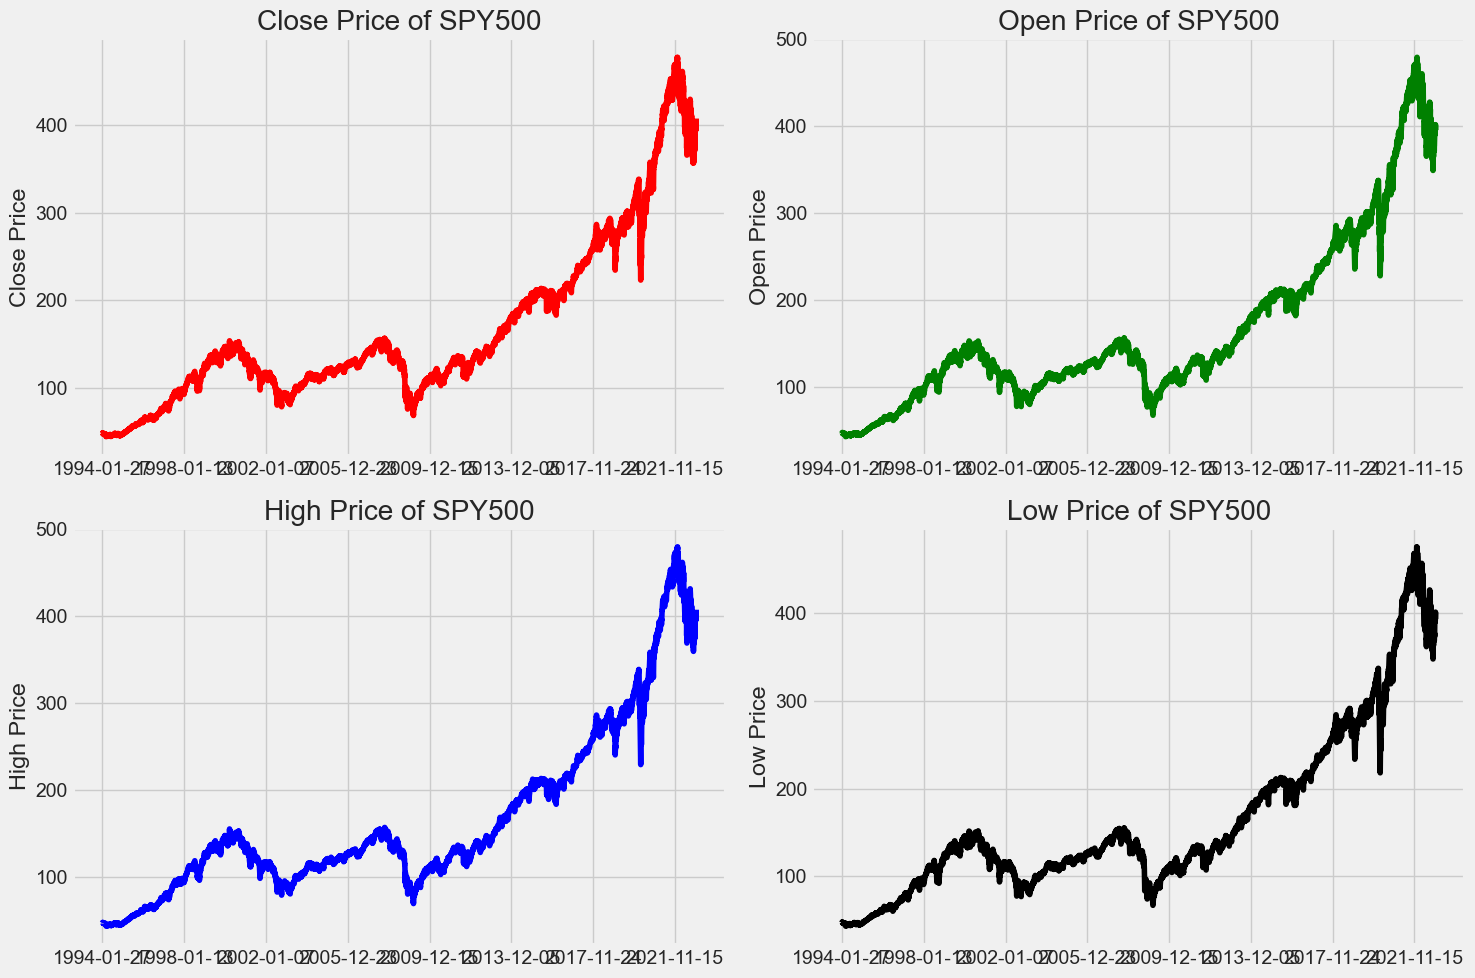

In [20]:
#Plotting Close, Open, High, Low of SPY
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
metrics = ['Close', 'Open', 'High', 'Low']
colors = ['red', 'green', 'blue', 'black']

for i, m in enumerate(metrics):
    #plot the metrics with colors
    plt.subplot(2, 2, i+1)
    df[m].plot(color=colors[i])
    plt.ylabel(m + " Price"	)
    plt.xlabel(None)
    plt.title(f"{m} Price of SPY500")

plt.tight_layout()


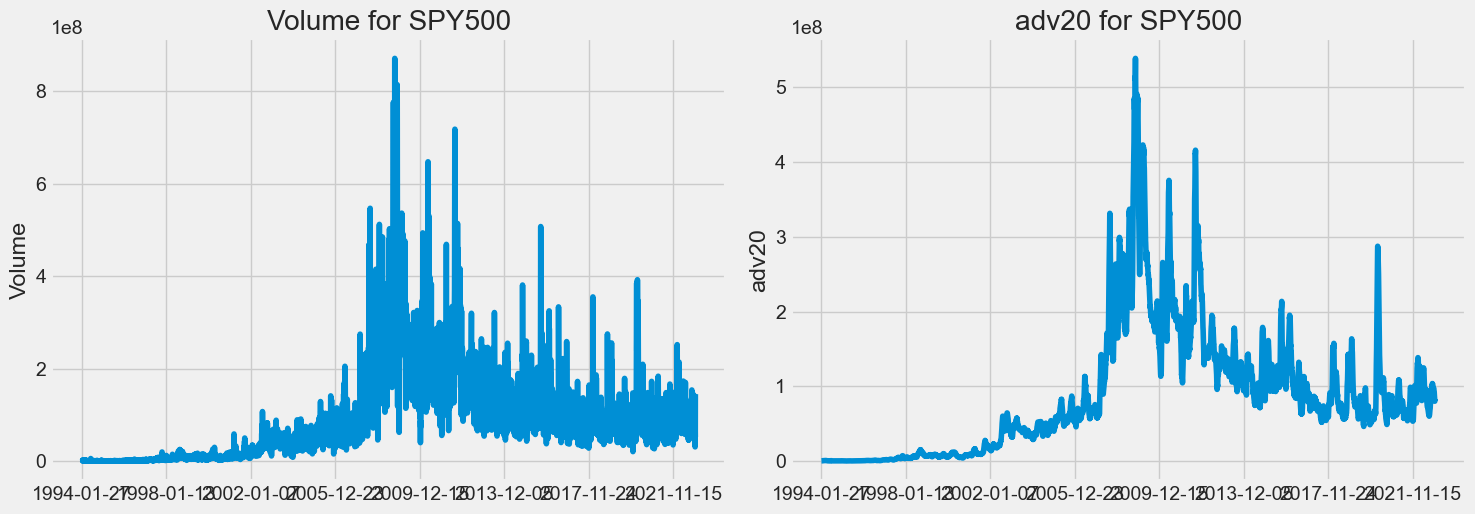

In [15]:
#Plotting Volume Data
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
vol_metrics = ['Volume', 'adv20']

for i, m in enumerate(vol_metrics,1):
    plt.subplot(2, 2, i)
    df[m].plot()
    plt.ylabel(m)
    plt.xlabel(None)
    plt.title(f"{m} for SPY500")

plt.tight_layout()


<AxesSubplot: title={'center': 'Different SMAs for SPY500'}, xlabel='Date'>

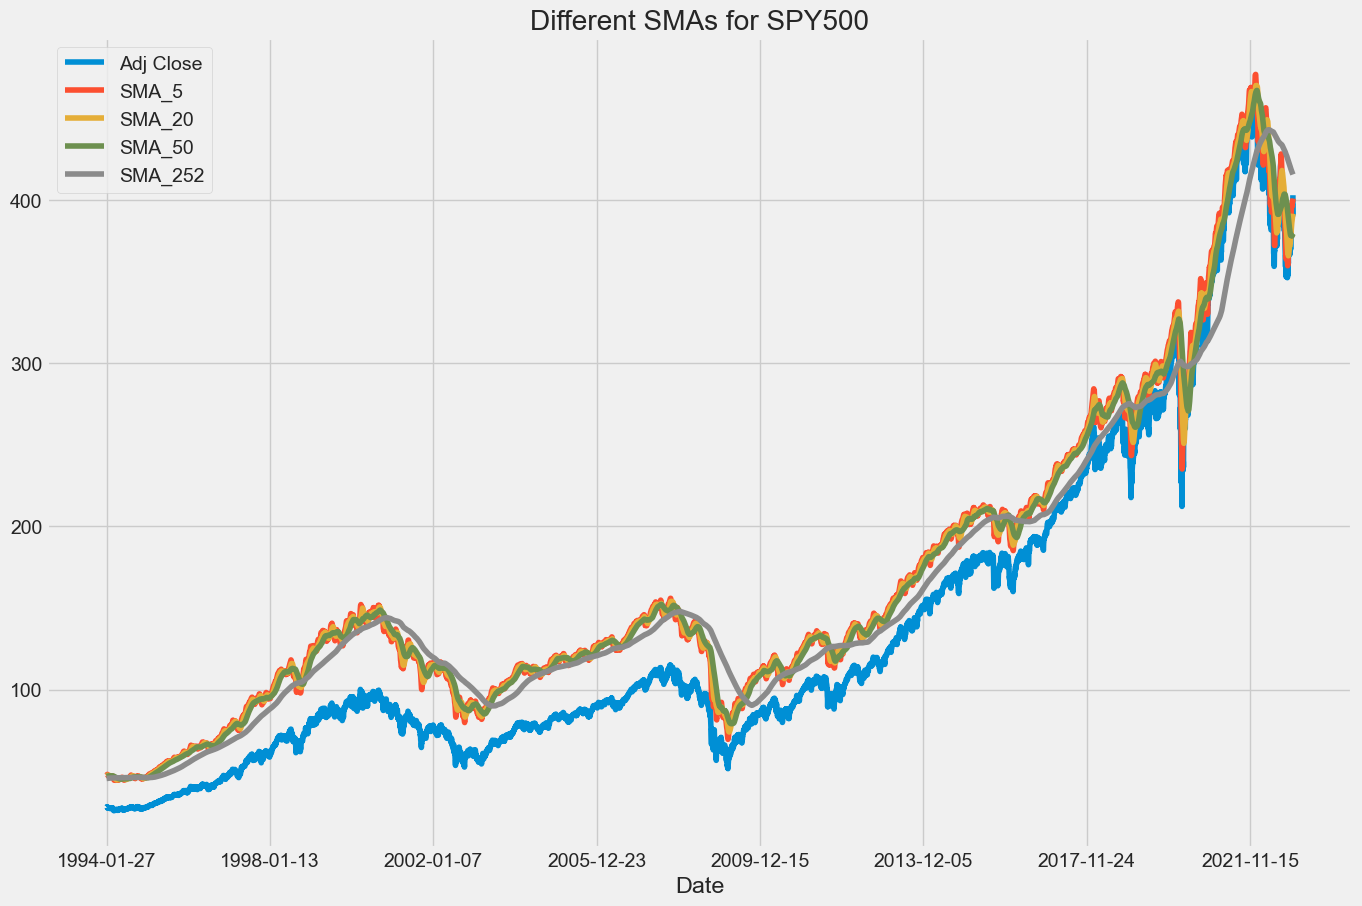

In [34]:
#Plotting MAs
metrics = ['Adj Close', 'SMA_5', 'SMA_20', 'SMA_50', 'SMA_252']
df[metrics].plot(figsize=(15, 10), title=f"Different SMAs for SPY500")



       daily_return  monthly_return
count   7263.000000     7263.000000
mean       0.036963        1.030255
std        1.210621        5.486568
min      -10.940000      -32.890000
25%       -0.480000       -1.640000
50%        0.060000        1.620000
75%        0.600000        4.240000
max       14.520000       28.370000


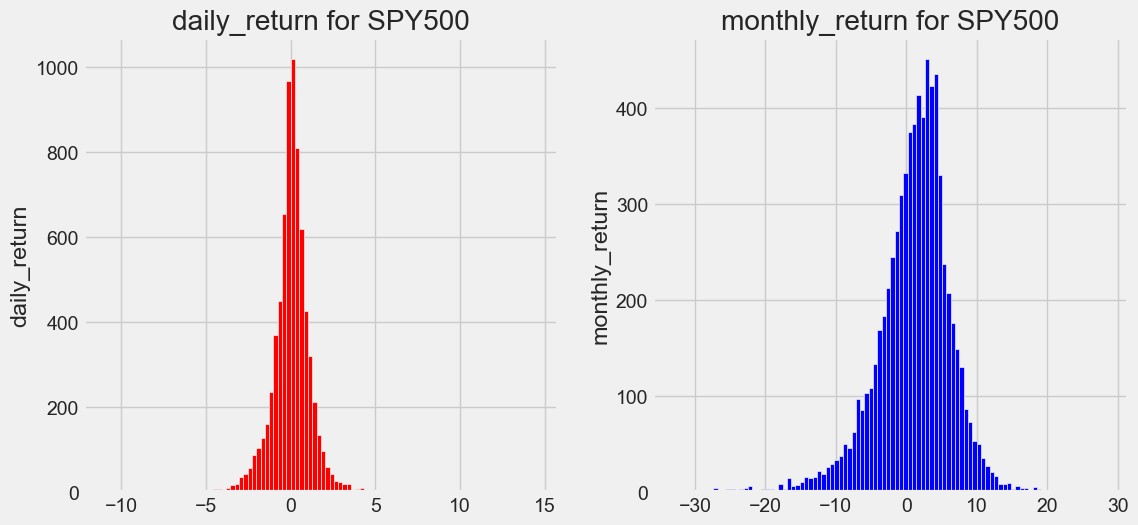

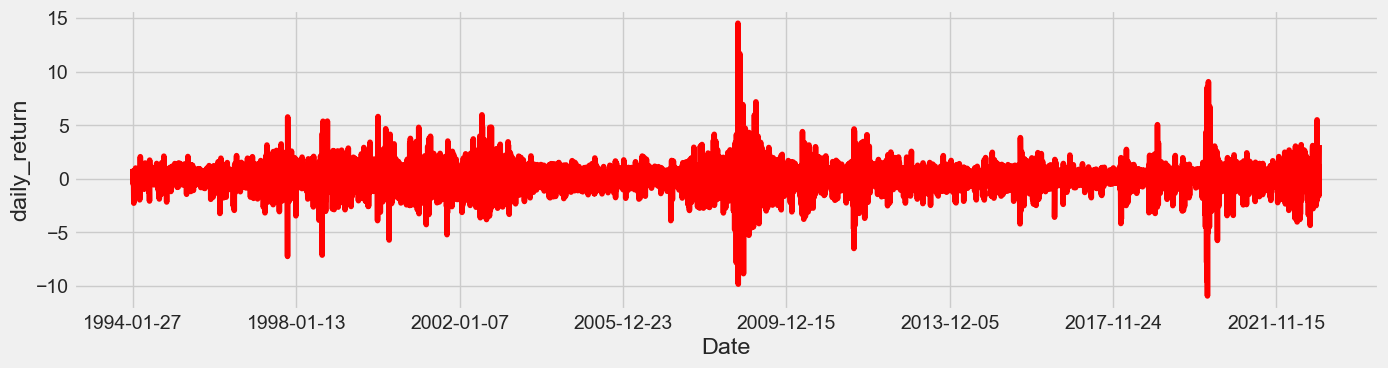

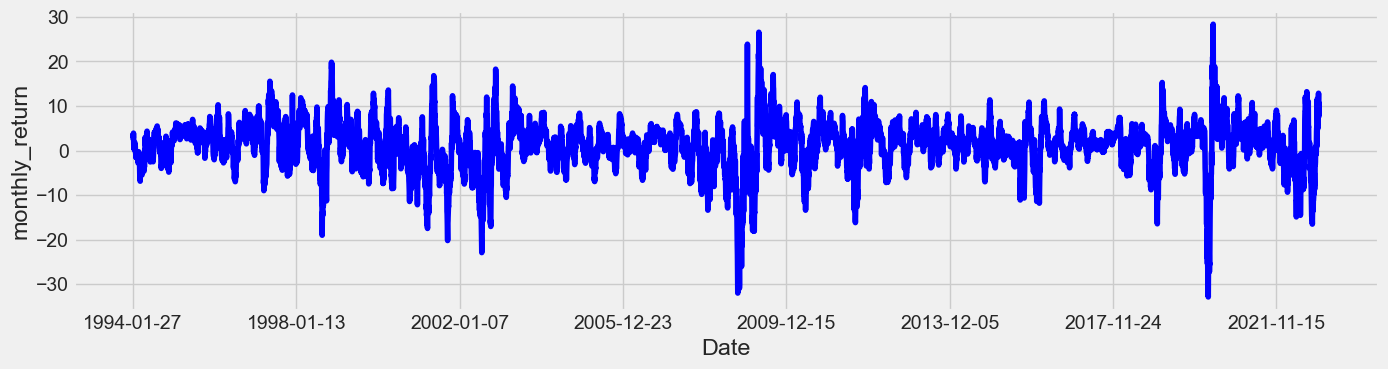

In [31]:
#Plotting Daily Returns
plt.figure(figsize=(12, 200))
plt.subplots_adjust(top=1.25, bottom=1.2)
colors = ['red', 'blue']

metrics = ['daily_return', 'monthly_return']
for i, m in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    df[m].hist(bins=100, color=colors[i-1])
    plt.ylabel(m)
    plt.xlabel(None)
    plt.title(f"Histogram of {m} for SPY500")
    
    

for (i, m) in enumerate(metrics, 1):
    plt.figure(figsize=(15, 10))
    plt.ylabel(m)
    plt.title(f"Average {m} for SPY500")
    plt.subplots_adjust(top=1.5, bottom=1.2)
    df[m].plot(figsize=(15, 10), color=colors[i-1])
    
print(df[metrics].describe())

In [18]:
#Output to csv
#df.to_csv('SPY_10years.csv')